In [1]:
import requests
import pandas as pd
import re
from matplotlib import pyplot as plt
from datetime import datetime

In [2]:
#client ID
with open('client_ID.txt', 'r') as file:
    client_id = file.read()    

In [3]:
#Streamer class. Instantiation gets streamer ID for given name, and uses it to pull stats on the streamer's last 100 streams
class streamer():
    def __init__(self, name):
        self.name=name
        self.ID = self.get_ID()
        self.streams = self.get_streams()
        
    def get_ID(self):
        url = f'https://api.twitch.tv/helix/users/?login={self.name}'
        headers = {'Client-ID': client_id,}
        streamer_id = (requests.get(url, headers=headers).json())['data'][0]['id']
        return streamer_id

    def get_streams(self):  
        url = f'https://api.twitch.tv/helix/videos?user_id={self.ID}'
        headers = {'Client-ID': client_id,}
        params = {'first' : 100}
        data = pd.DataFrame((requests.get(url, headers=headers, params=params).json())['data']) 

        def get_duration(timestring):         #Duration is given as a string with inconsistent format.
            if re.search('h', timestring):
                string_format = '%Hh%Mm%Ss'
            elif re.search('m', timestring):
                string_format ='%Mm%Ss'
            else:
                string_format = '%Ss'
            pt = datetime.strptime(timestring, string_format)
            return pt.second+pt.minute*60+pt.hour*3600

        data['duration_secs'] = data['duration'].apply(get_duration)
        return data

In [4]:
#Takes list of streamers and produces a DataFrame of their last 100 streams
def create_df(streamer_list):
    return pd.concat([streamer(s).streams for s in streamer_list], axis=0)

In [5]:
df = create_df(['chocotaco', 'shroud', 'drdisrespect'])
df.head()

,created_at,description,duration,id,language,published_at,thumbnail_url,title,type,url,user_id,user_name,view_count,viewable,duration_secs
0,2019-01-29T01:03:35Z,,5h1m49s,371531446,en,2019-01-29T01:03:35Z,https://static-cdn.jtvnw.net/s3_vods/719a28d7f...,TSM chocoTaco || it's a new week,archive,https://www.twitch.tv/videos/371531446,69906737,chocoTaco,2073,public,18109
1,2019-01-28T17:04:15Z,,5h4m17s,371305793,en,2019-01-28T17:04:15Z,https://static-cdn.jtvnw.net/s3_vods/bb4076ef2...,TSM chocoTaco || it's a new week,archive,https://www.twitch.tv/videos/371305793,69906737,chocoTaco,2359,public,18257
2,2019-01-28T06:44:24Z,,2h50m30s,371157769,en,2019-01-28T06:44:24Z,https://static-cdn.jtvnw.net/s3_vods/6316d359a...,TSM chocoTaco || secret dota stream,archive,https://www.twitch.tv/videos/371157769,69906737,chocoTaco,812,public,10230
3,2019-01-26T21:39:00Z,,8h15m11s,370352415,en,2019-01-26T21:39:00Z,https://static-cdn.jtvnw.net/s3_vods/6e4202201...,TSM chocoTaco || it's Saturday,archive,https://www.twitch.tv/videos/370352415,69906737,chocoTaco,8010,public,29711
4,2019-01-26T01:06:29Z,,4h48m11s,369839733,en,2019-01-26T01:06:29Z,https://static-cdn.jtvnw.net/s3_vods/a2759ed98...,TSM chocoTaco || FRIDAY NIGHT LETS DO WHAT WE ...,archive,https://www.twitch.tv/videos/369839733,69906737,chocoTaco,5487,public,17291


Text(0.5, 1.0, 'Stream duration (last 100 streams)')

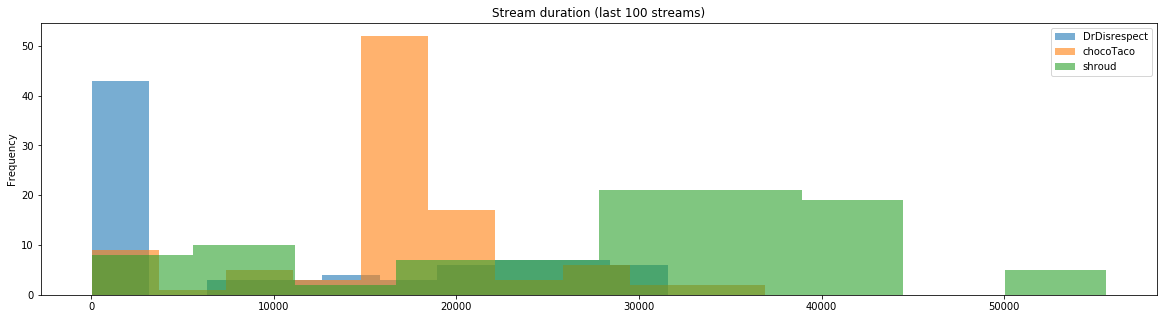

In [6]:
#Stream duration histogram
fig = plt.figure()
df.groupby('user_name')['duration_secs'].plot(kind='hist', alpha=0.6, figsize=(20,5))
plt.legend(df.groupby('user_name').count().index)  #Get names for legend in same order as groupby
plt.title('Stream duration (last 100 streams)')

Text(0.5, 1.0, 'Number of views per stream (last 100 streams)')

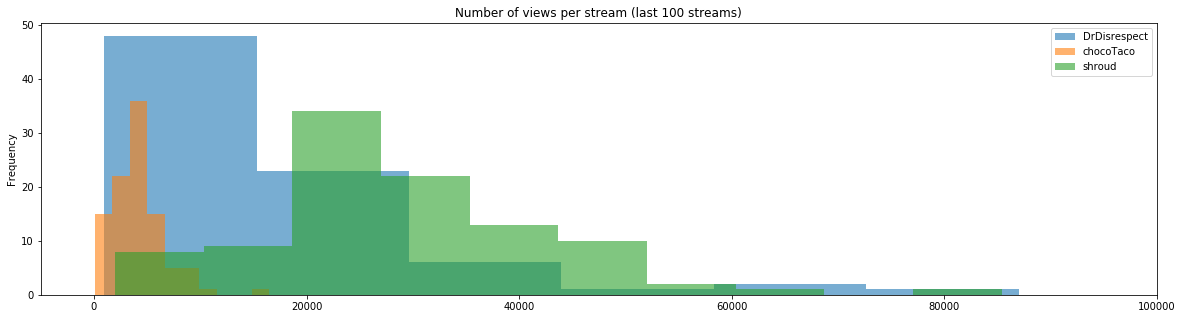

In [7]:
#Stream viewers histogram
fig = plt.figure()
df.groupby('user_name')['view_count'].plot(kind='hist', alpha=0.6, figsize=(20,5))
plt.legend(df.groupby('user_name').count().index)  #Get names for legend in same order as groupby
plt.xlim(-5000,100000)
plt.title('Number of views per stream (last 100 streams)')